In [1]:
import pandas as pd
pd.set_option('max_column', None)
pd.set_option('display.float_format',lambda x:'%5f'%x)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import utility functions
import sys
sys.path.append("../scripts")
from utility import get_data, null_analysis, describe_data, clean_data
#import plotting functions
from plots import plot_univariate, plot_bivariate, plot_3d

import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/katenjoki/Telecom_Week1Challenge/main/OneDrive/Desktop/10Academy/Telecom_Week1Challenge/data/Week1_challenge_data_source(CSV).csv'
data = get_data(url)
data.head()

Bearer Id            Start   Start ms              End  \
0 13114483460844900352.000000   4/4/2019 12:01 770.000000  4/25/2019 14:35   
1 13114483482878900224.000000   4/9/2019 13:04 235.000000   4/25/2019 8:15   
2 13114483484080500736.000000   4/9/2019 17:42   1.000000  4/25/2019 11:58   
3 13114483485442799616.000000   4/10/2019 0:31 486.000000   4/25/2019 7:36   
4 13114483499480700928.000000  4/12/2019 20:10 565.000000  4/25/2019 10:40   

      End ms      Dur. (ms)                   IMSI      MSISDN/Number  \
0 662.000000 1823652.000000 208201448079117.000000 33664962239.000000   
1 606.000000 1365104.000000 208201909211140.000000 33681854413.000000   
2 652.000000 1361762.000000 208200314458056.000000 33760627129.000000   
3 171.000000 1321509.000000 208201402342131.000000 33750343200.000000   
4 954.000000 1089009.000000 208201401415120.000000 33699795932.000000   

                   IMEI     Last Location Name  Avg RTT DL (ms)  \
0 35521209507511.000000  9.16456699548519E+015        42.000000   
1 35794009006359.000000                L77566A        65.000000   
2 35281510359387.000000                D42335A              NaN   
3 35356610164913.000000                T21824A              NaN   
4 35407009745539.000000                D88865A              NaN   

   Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0         5.000000                23.000000                44.000000   
1         5.000000                16.000000                26.000000   
2              NaN                 6.000000                 9.000000   
3              NaN                44.000000                44.000000   
4              NaN                 6.000000                 9.000000   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          NaN                          NaN   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0           100.000000                        0.000000   
1           100.000000                        0.000000   
2           100.000000                        0.000000   
3           100.000000                        0.000000   
4           100.000000                        0.000000   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                       0.000000            0.000000           100.000000   
1                       0.000000            0.000000           100.000000   
2                       0.000000            0.000000           100.000000   
3                       0.000000            0.000000           100.000000   
4                       0.000000            0.000000           100.000000   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                       0.000000                        0.000000   
1                       0.000000                        0.000000   
2                       0.000000                        0.000000   
3                       0.000000                        0.000000   
4                       0.000000                        0.000000   

   UL TP > 300 Kbps (%)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
0              0.000000              NaN              NaN   
1              0.000000              NaN              NaN   
2              0.000000              NaN              NaN   
3              0.000000              NaN              NaN   
4              0.000000              NaN              NaN   

   Activity Duration DL (ms)  Activity Duration UL (ms)       Dur. (ms).1  \
0               37624.000000               38787.000000 1823652892.000000   
1                 168.000000                3560.000000 1365104371.000000   
2                   0.000000                   0.000000 1361762651.000000   
3

In [3]:
data.shape

(150001, 55)

<h2>Task 1 : User Overview Analysis </h2>

<h3> Data Cleaning </h3>

**Checking for null values**

In [4]:
null_analysis(data)

The Telcommunication dataset has  12.501637867868759 % null values.


**Finding columns that have more than 30% of null values**

In [5]:
describe_data(data,30)

null     %null     type
TCP DL Retrans. Vol (Bytes)                88146 58.763608  float64
TCP UL Retrans. Vol (Bytes)                96649 64.432237  float64
HTTP DL (Bytes)                            81474 54.315638  float64
HTTP UL (Bytes)                            81810 54.539636  float64
Nb of sec with 125000B < Vol DL            97538 65.024900  float64
Nb of sec with 1250B < Vol UL < 6250B      92894 61.928920  float64
Nb of sec with 31250B < Vol DL < 125000B   93586 62.390251  float64
Nb of sec with 37500B < Vol UL            130254 86.835421  float64
Nb of sec with 6250B < Vol DL < 31250B     88317 58.877607  float64
Nb of sec with 6250B < Vol UL < 37500B    111843 74.561503  float64

**Dealing with null values and cleaning the data**

In [6]:
'''the fn clean data cleans the column names, converts date columns to  datetime and fills null values with mode or median
depending on the data type'''
data = clean_data(data)

#Check if there are any remaining null values in the data
(data.columns.isnull().sum()).sum()

0

In [7]:
#Dropping columns with more than 30% null values,apart from the TCP columns
data=data.drop(['HTTP_DL_(Bytes)', 'HTTP_UL_(Bytes)', 'Nb_of_sec_with_125000B_<_Vol_DL', 'Nb_of_sec_with_1250B_<_Vol_UL_<_6250B', 'Nb_of_sec_with_31250B_<_Vol_DL_<_125000B', 'Nb_of_sec_with_37500B_<_Vol_UL', 'Nb_of_sec_with_6250B_<_Vol_DL_<_31250B', 'Nb_of_sec_with_6250B_<_Vol_UL_<_37500B'],axis=1)
data.shape

(149010, 47)

In [8]:
data.sample(3)

Bearer_Id            Start  \
61981  13042425965600299008.000000   4/26/2019 5:14   
83907  13114483565478500352.000000  4/27/2019 10:45   
133546 13114483571630100480.000000  4/28/2019 19:02   

                            Start_ms             End  \
61981  1970-01-01 00:00:00.000000682  4/27/2019 5:46   
83907  1970-01-01 00:00:00.000000837  4/28/2019 0:01   
133546 1970-01-01 00:00:00.000000826  4/30/2019 9:34   

                              End_ms     Dur._(ms)                   IMSI  \
61981  1970-01-01 00:00:00.000000424  88280.000000 208201546113070.000000   
83907  1970-01-01 00:00:00.000000103  47792.000000 208201907733209.000000   
133546 1970-01-01 00:00:00.000000065 138775.000000 208201713940116.000000   

            MSISDN_Number                  IMEI Last_Location_Name  \
61981  33651580385.000000 35214310121704.000000            L70516C   
83907  33642432978.000000 35306509298528.000000            T21067C   
133546 33638802476.000000 86790503798717.000000            D42382B   

        Avg_RTT_DL_(ms)  Avg_RTT_UL_(ms)  Avg_Bearer_TP_DL_(kbps)  \
61981         45.000000         5.000000                60.000000   
83907         25.000000         4.000000                51.000000   
133546        23.000000         5.000000                50.000000   

        Avg_Bearer_TP_UL_(kbps)  TCP_DL_Retrans._Vol_(Bytes)  \
61981                 51.000000                574618.500000   
83907                 64.000000                574618.500000   
133546                46.000000                574618.500000   

        TCP_UL_Retrans._Vol_(Bytes)  DL_TP_<_50_Kbps_(%)  \
61981                  20985.500000           100.000000   
83907                  20985.500000           100.000000   
133546                 20985.500000           100.000000   

        50_Kbps_<_DL_TP_<_250_Kbps_(%)  250_Kbps_<_DL_TP_<_1_Mbps_(%)  \
61981                         0.000000                       0.000000   
83907                         0.000000                       0.000000   
133546                        0.000000                       0.000000   

        DL_TP_>_1_Mbps_(%)  UL_TP_<_10_Kbps_(%)  \
61981             0.000000           100.000000   
83907             0.000000           100.000000   
133546            0.000000           100.000000   

        10_Kbps_<_UL_TP_<_50_Kbps_(%)  50_Kbps_<_UL_TP_<_300_Kbps_(%)  \
61981                        0.000000                        0.000000   
83907                        0.000000                        0.000000   
133546                       0.000000                        0.000000   

        UL_TP_>_300_Kbps_(%)  Activity_Duration_DL_(ms)  \
61981               0.000000               18633.000000   
83907               0.000000               29616.000000   
133546              0.000000               47811.000000   

        Activity_Duration_UL_(ms)      Dur._(ms).1 Handset_Manufacturer  \
61981                20171.000000  88280742.000000              Samsung   
83907                28239.000000  47792266.000000                Apple   
133546               64704.000000 138775239.000000               Huawei   

                          Handset_Type  Nb_of_sec_with_Vol_DL_<_6250B  \
61981     Samsung Galaxy S7 (Sm-G930X)                      78.000000   
83907          Apple iPhone Se (A1723)                     170.000000   
133546  Huawei P20 Lite Huawei Nova 3E                     192.000000   

        Nb_of_sec_with_Vol_UL_<_1250B  Social_Media_DL_(Bytes)  \
61981                       89.000000           3067611.000000   
83907                      179.000000           2808358.000000   
133546                     208.000000           2913596.000000   

        Social_Media_UL_(Bytes)  Google_DL_(Bytes)  Google_UL_(Bytes)  \
61981              37691.000000     1550979.000000     2378658.000000   
83907              10733.000000    10085418.000000     2210281.000000   
133546             56207.000000     9602256.000000     3700948.000000   

        Email_DL_(Bytes)  Email_UL

**Normalize each engagement metric;user behavior can be tracked through the following applications:  Social Media, Google, Email, Youtube, Netflix, Gaming, Other.**
**These variables will be used for k-means forecasting hence why we normalize**

In [9]:
#from sklearn.preprocessing import MinMaxScaler
#columns = ['Social_Media_DL_(Bytes)','Social_Media_UL_(Bytes)', 'Google_DL_(Bytes)', 'Google_UL_(Bytes)','Email_DL_(Bytes)', 'Email_UL_(Bytes)', 'Youtube_DL_(Bytes)','Youtube_UL_(Bytes)', 'Netflix_DL_(Bytes)', 'Netflix_UL_(Bytes)',
 #      'Gaming_DL_(Bytes)', 'Gaming_UL_(Bytes)', 'Other_DL_(Bytes)','Other_UL_(Bytes)']

#data[columns]=MinMaxScaler().fit_transform(data[columns])

 **Function to determine top n entries**

**Identifying the top 10 handsets used by the customers**

In [10]:
def top_n(df:pd.DataFrame,column:str,n:int):
    top=df[column].value_counts().head(n)
    return top

top_n(data,'Handset_Type',10)

Huawei B528S-23A                19763
Apple iPhone 6S (A1688)          9401
Apple iPhone 6 (A1586)           9004
undefined                        8960
Apple iPhone 7 (A1778)           6301
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4504
Apple iPhone X (A1901)           3809
Name: Handset_Type, dtype: int64

**Identifying the top 3 handset manufacturers**

In [11]:
top_n(data,'Handset_Manufacturer',3)

Apple      59451
Samsung    40689
Huawei     34353
Name: Handset_Manufacturer, dtype: int64

**Identifying the top 5 handsets per top 3 handset manufacturer**

In [12]:
dataframe=data[['Handset_Manufacturer','Handset_Type']]
manufacturers=top_n(data,'Handset_Manufacturer',3).index.to_list()
dataframe = dataframe[dataframe['Handset_Manufacturer'].isin(manufacturers)]

dataframe.groupby('Handset_Manufacturer').Handset_Type.value_counts().groupby(level=0,group_keys=False).head(5)

Handset_Manufacturer  Handset_Type                  
Apple                 Apple iPhone 6S (A1688)            9401
                      Apple iPhone 6 (A1586)             9004
                      Apple iPhone 7 (A1778)             6301
                      Apple iPhone Se (A1723)            5176
                      Apple iPhone 8 (A1905)             4985
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2015
                      Huawei P20                         1476
                      Huawei Y6 2018                      996
Samsung               Samsung Galaxy S8 (Sm-G950F)       4504
                      Samsung Galaxy A5 Sm-A520F         3716
                      Samsung Galaxy J5 (Sm-J530)        3689
                      Samsung Galaxy J3 (Sm-J330)        3476
                      Samsung Galaxy S7 (Sm-G930X)       3194
Name: Handset_Typ

**Overview of the users’ behavior on the applications**  

We create a new dataframe, 'frame' with new columns that aggregate the UL+DL Bytes for each application

In [13]:
def sum_columns(df,col1,col2):
    return df[col1]+df[col2]

def avg_col(df,col1,col2):
    return (sum_columns(df,col1,col2))/2

frame = pd.DataFrame(data,columns=['MSISDN_Number','Bearer_Id','Dur._(ms)','Handset_Type'])
frame['Social_Media_Bytes']=sum_columns(data,'Social_Media_DL_(Bytes)','Social_Media_UL_(Bytes)')
frame['Google_Bytes']=sum_columns(data,'Google_DL_(Bytes)','Google_UL_(Bytes)')
frame['Email_Bytes']=sum_columns(data,'Email_DL_(Bytes)','Email_UL_(Bytes)')
frame['Youtube_Bytes']=sum_columns(data,'Youtube_DL_(Bytes)','Youtube_UL_(Bytes)')
frame['Netflix_Bytes']=sum_columns(data,'Netflix_DL_(Bytes)','Netflix_UL_(Bytes)')
frame['Gaming_Bytes']=sum_columns(data,'Gaming_DL_(Bytes)','Gaming_UL_(Bytes)')
frame['Other_Bytes']=sum_columns(data,'Other_DL_(Bytes)','Other_UL_(Bytes)')
frame['Total_Bytes']=sum_columns(data,'Total_DL_(Bytes)','Total_UL_(Bytes)')
frame['Avg_RTT_ms']= avg_col(data,'Avg_RTT_DL_(ms)','Avg_RTT_UL_(ms)')
frame['Avg_TCP_Bytes']=avg_col(data,'TCP_DL_Retrans._Vol_(Bytes)', 'TCP_UL_Retrans._Vol_(Bytes)')
frame['Avg_Throughput_kbps']=avg_col(data,'Avg_Bearer_TP_DL_(kbps)', 'Avg_Bearer_TP_UL_(kbps)')

frame.head()                                      

MSISDN_Number                   Bearer_Id      Dur._(ms)  \
0 33664962239.000000 13114483460844900352.000000 1823652.000000   
1 33681854413.000000 13114483482878900224.000000 1365104.000000   
2 33760627129.000000 13114483484080500736.000000 1361762.000000   
3 33750343200.000000 13114483485442799616.000000 1321509.000000   
4 33699795932.000000 13114483499480700928.000000 1089009.000000   

                  Handset_Type  Social_Media_Bytes    Google_Bytes  \
0   Samsung Galaxy A5 Sm-A520F      1570185.000000  2905912.000000   
1  Samsung Galaxy J5 (Sm-J530)      1933278.000000  4414096.000000   
2     Samsung Galaxy A8 (2018)      1726277.000000 10229119.000000   
3                    undefined       657493.000000 11811761.000000   
4             Samsung Sm-G390F       912788.000000  7748843.000000   

     Email_Bytes   Youtube_Bytes   Netflix_Bytes     Gaming_Bytes  \
0 3701304.000000 18355943.000000 17855187.000000 292426453.000000   
1  937385.000000 39359124.000000 35565545.000000 609920783.000000   
2 3363124.000000 34425237.000000 23751202.000000 229980251.000000   
3 2070983.000000 36534765.000000 15092588.000000 810387875.000000   
4 2110349.000000 34222253.000000 17539799.000000 531237049.000000   

       Other_Bytes      Total_Bytes  Avg_RTT_ms  Avg_TCP_Bytes  \
0 180558843.000000 345629377.000000   23.500000  297802.000000   
1 541959383.000000 707185356.000000   35.000000  297802.000000   
2 414908351.000000 307690973.000000   25.000000  297802.000000   
3 761837216.000000 889352748.000000   25.000000  297802.000000   
4 564619822.000000 607681403.000000   25.000000  297802.000000   

   Avg_Throughput_kbps  
0            33.500000  
1            21.000000  
2             7.500000  
3            44.000000  
4             7.500000

**To make interpretaion of the data easier to digest, we convert the Bytes to Megabytes and miliseconds to seconds**

In [14]:
def convert_cols(df:pd.DataFrame,col:str,col_rep:str):
    #convert ms to s
    df[col] =df[col]/1000
    df.rename(columns={col:col_rep},inplace = True)
    #convert bytes to megabytes
    df.columns = df.columns.str.replace('Bytes','MB')
    for i in df.columns:
        if 'Bytes' in i:
            megabyte = 1*10e+5
            df[i] = df[i]/megabyte
    return df

frame = convert_cols(frame,'Dur._(ms)','Session_Duration_s')
frame.columns

Index(['MSISDN_Number', 'Bearer_Id', 'Session_Duration_s', 'Handset_Type',
       'Social_Media_MB', 'Google_MB', 'Email_MB', 'Youtube_MB', 'Netflix_MB',
       'Gaming_MB', 'Other_MB', 'Total_MB', 'Avg_RTT_ms', 'Avg_TCP_MB',
       'Avg_Throughput_kbps'],
      dtype='object')

We create a new dataframe using groupby to get the aggregate values per unique identifier i.e. the MSISDN Number

In [15]:
df=frame.groupby(['MSISDN_Number','Handset_Type']).agg({'Bearer_Id':'count', 'Session_Duration_s':'sum', 'Total_MB':'sum','Social_Media_MB':'sum', 'Google_MB':'sum', 'Email_MB':'sum',
       'Youtube_MB':'sum', 'Netflix_MB':'sum', 'Gaming_MB':'sum', 'Other_MB':'sum','Avg_RTT_ms':'mean','Avg_TCP_MB':'mean','Avg_Throughput_kbps':'mean'}).reset_index()

df.rename(columns={'Bearer_Id':'No_of_xDRsessions'},inplace=True)
df.sample()

MSISDN_Number             Handset_Type  No_of_xDRsessions  \
82295 33688186763.000000  Apple iPhone Xr (A2105)                  1   

       Session_Duration_s         Total_MB  Social_Media_MB      Google_MB  \
82295           35.055000 635312843.000000   2472006.000000 9970818.000000   

            Email_MB      Youtube_MB      Netflix_MB        Gaming_MB  \
82295 1576225.000000 28390016.000000 32575701.000000 547597556.000000   

              Other_MB  Avg_RTT_ms   Avg_TCP_MB  Avg_Throughput_kbps  
82295 630790654.000000   32.500000 70119.000000         18083.000000

<h3>Exploratory Data Analysis</h3>

**Univariate Analysis**

In [16]:
user=df.copy()

**From the max values of each column, it is evident that the data has outliers, which will affect our EDA, hence
  we have to find a way to deal with them**

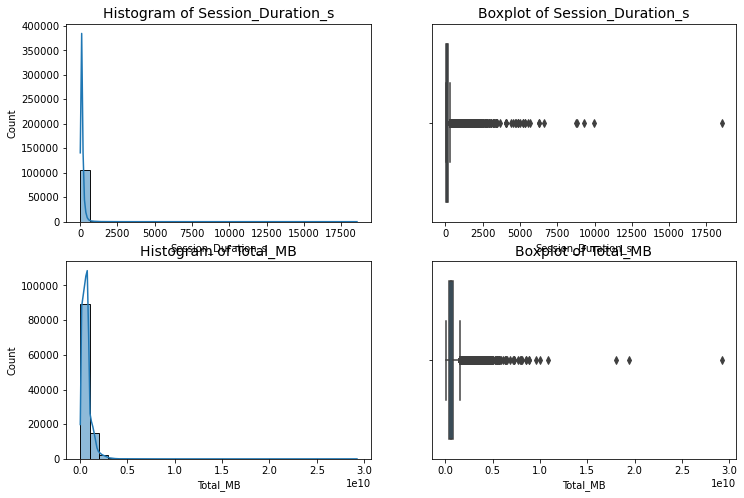

In [17]:
#plot before removing outliers
plot_univariate(user,'Session_Duration_s','Total_MB')

In [18]:
columns = user.columns.to_list()
'''remove columns MSISDN_Number, Handset_Type'''
del columns[:2]
for i in columns:
    user[i] = np.where(user[i] > user[i].quantile(0.95), user[i].median(),user[i])

In [19]:
user.describe()

MSISDN_Number  No_of_xDRsessions  Session_Duration_s  \
count          106577.000000      106577.000000       106577.000000   
mean      45144684684.863426           1.284076          120.040410   
std     2893202940895.355957           0.535163           77.020107   
min       33601001722.000000           1.000000            7.142000   
25%       33650885114.000000           1.000000           72.316000   
50%       33663665845.000000           1.000000          103.114000   
75%       33683406087.000000           1.000000          163.957000   
max   882397108489451.000000           3.000000          370.730000   

               Total_MB  Social_Media_MB       Google_MB       Email_MB  \
count     106577.000000    106577.000000   106577.000000  106577.000000   
mean   614931751.789044   2260779.774060  9689863.262833 2800361.538869   
std    332403127.385900   1328535.184373  5013777.406577 1482578.558974   
min     33249009.000000      1563.000000    40330.000000   18176.000000   
25%    358840686.000000   1212147.000000  5945538.000000 1675674.000000   
50%    618397626.000000   2305817.000000  9592858.000000 2801703.000000   
75%    810762352.000000   3117421.000000 12328002.000000 3625533.000000   
max   1603633088.000000   6093532.000000 24810448.000000 7228503.000000   

           Youtube_MB      Netflix_MB         Gaming_MB          Other_MB  \
count   106577.000000   106577.000000     106577.000000     106577.000000   
mean  28094639.476482 28073448.472175  531960612.032277  530473766.755829   
std   13889939.749044 13941130.058030  311629503.292939  312083839.685416   
min      78903.000000   184569.000000     306358.000000     149045.000000   
25%   18639324.000000 18572865.000000  288332617.000000  285873168.000000   
50%   26821223.000000 26732021.000000  542867981.000000  540204321.000000   
75%   35111863.000000 35102550.000000  731723933.000000  729394944.000000   
max   71039429.000000 71115529.000000 1435079649.000000 1437577431.000000   

         Avg_RTT_ms     Avg_TCP_MB  Avg_Throughput_kbps  
count 106577.000000  106577.000000        106577.000000  
mean      31.849784  461103.121647          4426.926494  
std       22.038213  731605.080907          7439.093058  
min        0.000000      48.500000             0.000000  
25%       20.000000  291536.750000            46.000000  
50%       25.000000  297802.000000           100.000000  
75%       33.500000  297802.000000          6489.500000  
max      146.500000 5656437.000000         30694.500000

In [20]:
user[['Netflix_MB', 'Gaming_MB', 'Other_MB']].describe()

Netflix_MB         Gaming_MB          Other_MB
count   106577.000000     106577.000000     106577.000000
mean  28073448.472175  531960612.032277  530473766.755829
std   13941130.058030  311629503.292939  312083839.685416
min     184569.000000     306358.000000     149045.000000
25%   18572865.000000  288332617.000000  285873168.000000
50%   26732021.000000  542867981.000000  540204321.000000
75%   35102550.000000  731723933.000000  729394944.000000
max   71115529.000000 1435079649.000000 1437577431.000000

**Some interesting observations made from our data:**

* There's an average of one xDR session per user
* Maximum # of xDR sessions , after removing outliers are 3 per user
* Each session lasts for an average of 120s per user
* Gaming and 'Other' categories consume the most data on average
* While social media apps and emails consume the least

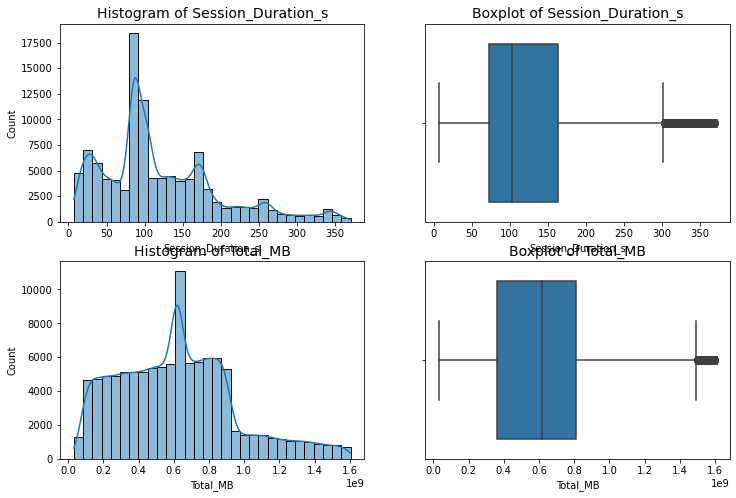

In [21]:
plot_univariate(user,'Session_Duration_s','Total_MB')

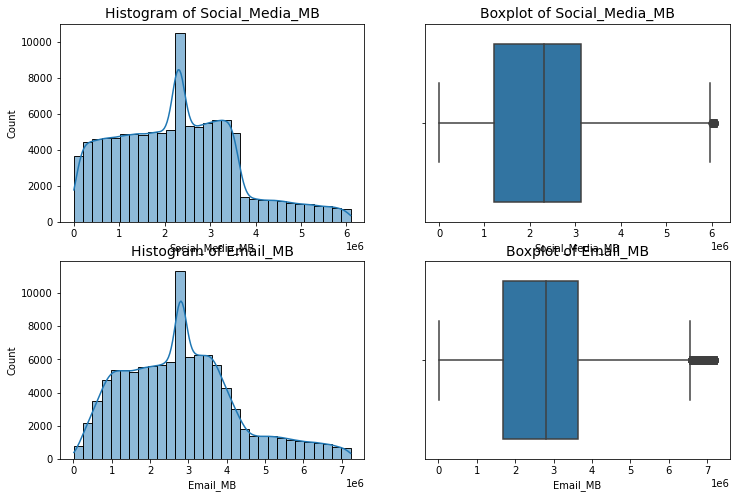

In [22]:
plot_univariate(user,'Social_Media_MB','Email_MB',)

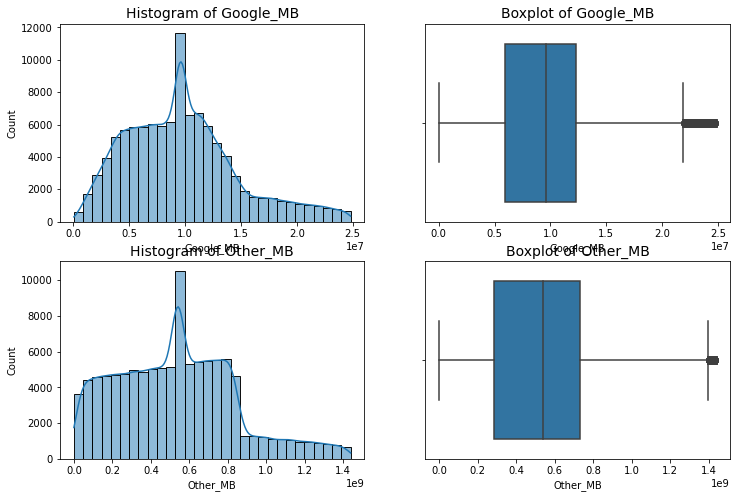

In [23]:
plot_univariate(user,'Google_MB','Other_MB',)

**Bivariate Analysis**

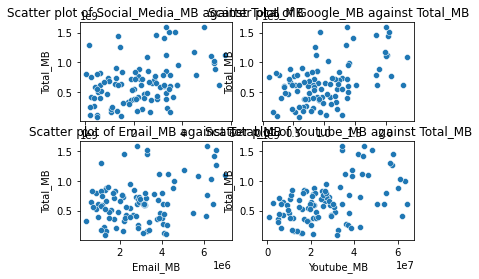

In [24]:
plot_bivariate(user.head(100),'Social_Media_MB','Google_MB','Email_MB', 'Youtube_MB')

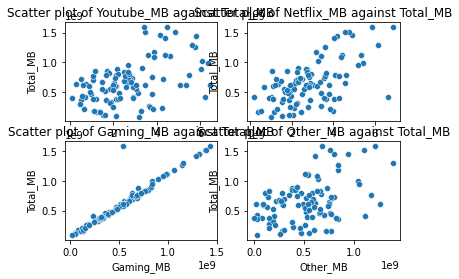

In [25]:
plot_bivariate(user.head(100),'Youtube_MB', 'Netflix_MB','Gaming_MB', 'Other_MB')

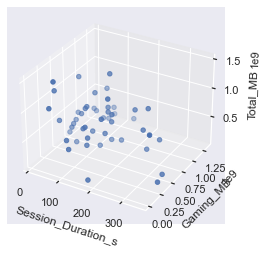

In [26]:
plot_3d(user,'Session_Duration_s','Gaming_MB','Total_MB',50)

In [27]:
import random
from mpl_toolkits.mplot3d import Axes3D


* Gaming is highly correlated to total MB as seen on the plot
* 

**Variable transformations**

In [28]:
user['DecileRank']= pd.qcut(user['Session_Duration_s'],q = 5, labels = False)
user.sample(5)

MSISDN_Number                        Handset_Type  \
46799  33662076471.000000                      Huawei Fig-Lx1   
1594   33606455295.000000      Samsung Galaxy A6 Sm-A600Fn Ds   
101142 33768247235.000000     Samsung Galaxy S5 Neo (Sm-G903)   
26826  33650926847.000000         Samsung Galaxy J3 (Sm-J330)   
91229  33758141670.000000  Sony Mobile Comm. Xperia Xa2 Ultra   

        No_of_xDRsessions  Session_Duration_s         Total_MB  \
46799            1.000000          133.846000 127229961.000000   
1594             1.000000          105.567000 807882814.000000   
101142           1.000000           82.600000  79580857.000000   
26826            1.000000          112.450000 136766818.000000   
91229            2.000000          367.217000 511284763.000000   

        Social_Media_MB       Google_MB       Email_MB      Youtube_MB  \
46799    2532415.000000  5944073.000000 1091963.000000 19303776.000000   
1594      517498.000000 11555964.000000 1824095.000000 30709928.000000   
101142   1910081.000000  7578498.000000 1145316.000000 15786734.000000   
26826     442750.000000  5467497.000000 2900386.000000 37528583.000000   
91229    4301787.000000 14541661.000000 5558131.000000 41409099.000000   

            Netflix_MB        Gaming_MB         Other_MB  Avg_RTT_ms  \
46799  28970117.000000  65584312.000000  82986305.000000   23.500000   
1594   19548020.000000 735399691.000000 603006554.000000   25.000000   
101142 28017541.000000  23926815.000000 450274201.000000   23.000000   
26826  17818226.000000  60529757.000000 402745379.000000   25.000000   
91229  48389253.000000 374925217.000000 809988853.000000   32.750000   

          Avg_TCP_MB  Avg_Throughput_kbps  DecileRank  
46799  159470.250000         18639.500000           3  
1594   297802.000000            45.500000           2  
101142 246096.000000         14325.500000           1  
26826  297802.000000            33.000000           2  
91229  181211.375000          1254.500000           4

In [29]:
user.groupby('DecileRank')['Total_MB'].sum()

DecileRank
0   11450357681489.000000
1   12305656268152.000000
2   12661416425716.000000
3   12955375876996.000000
4   16164775058068.000000
Name: Total_MB, dtype: float64

**Correlation Analysis**

<AxesSubplot:>

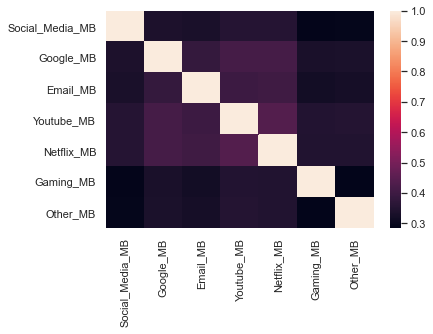

In [30]:
dataset=user[['Social_Media_MB', 'Google_MB', 'Email_MB','Youtube_MB', 'Netflix_MB', 'Gaming_MB', 'Other_MB']]
corr = dataset.corr()
sns.heatmap(corr)

**Principal Component Analysis**

In [31]:
from sklearn.preprocessing import StandardScaler
columns = ['Social_Media_MB', 'Google_MB', 'Email_MB', 'Youtube_MB','Netflix_MB', 'Gaming_MB', 'Other_MB']
dataset[columns]=StandardScaler().fit_transform(dataset[columns])
dataset.head()

Social_Media_MB  Google_MB  Email_MB  Youtube_MB  Netflix_MB  Gaming_MB  \
0        -0.021561  -1.057263 -0.990846   -0.465814   -0.064017   0.900105   
1         0.300923  -0.868611  0.342256   -1.127614   -1.208780  -1.322765   
2         0.703668  -1.245920  0.273186   -0.486762   -0.625458   0.022036   
3        -1.490736  -0.002268 -0.347836   -1.520339   -1.874416  -0.451931   
4         0.490589   1.757117  0.340697    0.967493    1.515542   2.512088   

   Other_MB  
0 -0.461105  
1 -0.797109  
2 -0.092220  
3 -1.586742  
4  0.879033

In [32]:
from sklearn.decomposition import PCA

pca = PCA()
transform=pca.fit_transform(dataset)
dataset_transform=pd.DataFrame(transform,columns = ['Social_Media_Bytes', 'Google_Bytes', 'Email_Bytes', 'Youtube_Bytes','Netflix_Bytes', 'Gaming_Bytes', 'Other_Bytes'])
dataset_transform.head()

Social_Media_Bytes  Google_Bytes  Email_Bytes  Youtube_Bytes  \
0           -0.868211      1.049901     0.131149      -0.996884   
1           -1.790676     -0.630518    -1.049063      -0.038919   
2           -0.613015     -0.015459    -0.512952      -0.916453   
3           -2.751544      0.797584     0.094625       0.735525   
4            3.183436      1.377972     0.807179      -0.276337   

   Netflix_Bytes  Gaming_Bytes  Other_Bytes  
0      -0.086898     -0.605744    -0.319995  
1       1.044380      0.520183     0.111754  
2       1.105469     -0.214158     0.110739  
3       0.202168      1.412059     0.313492  
4      -0.864465      0.281019    -0.416136

<h2>Task 2 - User Engagement analysis</h2>

Tracking the user’s engagement using the following engagement metrics: 
* sessions frequency 
* the duration of the session 
* the sessions total traffic (download and upload (bytes))

The **user** dataframe had already aggregated the aforementioned metrics

**Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric** 

In [33]:
def sort_metrics(data,col1,col2):
    df=data[[col1,col2]]
    dataf=df.sort_values(by=col1,ascending=False).head(10)
    return dataf

In [34]:
sort_metrics(user,'No_of_xDRsessions','MSISDN_Number')

No_of_xDRsessions      MSISDN_Number
86972            3.000000 33699012126.000000
58534            3.000000 33665084791.000000
11069            3.000000 33622438219.000000
103669           3.000000 33781321921.000000
69550            3.000000 33668631014.000000
11066            3.000000 33622433946.000000
33472            3.000000 33658971333.000000
13780            3.000000 33626784594.000000
58560            3.000000 33665092145.000000
13782            3.000000 33626789617.000000

In [35]:
sort_metrics(user,'Session_Duration_s','MSISDN_Number')

Session_Duration_s      MSISDN_Number
70629           370.730000 33669020500.000000
34468           370.687000 33659180623.000000
93301           370.667000 33760824000.000000
63522           370.656000 33666680114.000000
65112           370.558000 33667204202.000000
99820           370.496000 33763600149.000000
49520           370.479000 33662705423.000000
41816           370.424000 33660880023.000000
21985           370.386000 33647930614.000000
104435          370.313000 33782406274.000000

In [36]:
sort_metrics(user,'Total_MB','MSISDN_Number')

Total_MB      MSISDN_Number
3150  1603633088.000000 33609736461.000000
86222 1603596892.000000 33698786968.000000
51010 1603506367.000000 33663076315.000000
78278 1603475888.000000 33680109650.000000
64917 1603332027.000000 33667137860.000000
91569 1603254860.000000 33760089388.000000
70048 1603193659.000000 33668811505.000000
60623 1603177432.000000 33665646010.000000
95513 1602907546.000000 33761616097.000000
93002 1602880939.000000 33760679881.000000

In [37]:
user.columns

Index(['MSISDN_Number', 'Handset_Type', 'No_of_xDRsessions',
       'Session_Duration_s', 'Total_MB', 'Social_Media_MB', 'Google_MB',
       'Email_MB', 'Youtube_MB', 'Netflix_MB', 'Gaming_MB', 'Other_MB',
       'Avg_RTT_ms', 'Avg_TCP_MB', 'Avg_Throughput_kbps', 'DecileRank'],
      dtype='object')

**K-means clustering, to classify customers in three groups of engagement.**
* Our engagement metrics have different variances i.e 0.535166, 76.961036 and 332.115321  respectively for variables 'No_of_xDRsessions', 'Session_Duration_s', 'Total_MB' 
* Therefore, we standardise each engagement metric before carrying out K-means
* We use unlabelled data for this so we drop the MSISDN_Number

In [38]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
def kmeans_clusters(df,columns,n,title):
    kmeans=KMeans(n_clusters=n)
    data=df.copy()
    data[columns]=StandardScaler().fit_transform(data[columns])
    cluster=kmeans.fit_predict(data[columns])
    df[title]=cluster

In [39]:
columns = ['No_of_xDRsessions', 'Session_Duration_s', 'Total_MB']
kmeans_clusters(df,columns,3,'engagement_clusters')

In [40]:
engagement_metrics=df.groupby('engagement_clusters').agg({'No_of_xDRsessions':['min','mean','max','sum'],
                                      'Session_Duration_s':['min','mean','max','sum'],
                                      'Total_MB':['min','mean','max','sum']})
engagement_metrics

No_of_xDRsessions                     Session_Duration_s  \
                                  min     mean max    sum                min   
engagement_clusters                                                            
0                                   1 1.032223   2  82456           7.142000   
1                                   1 2.199607   4  51451          18.235000   
2                                   1 4.571126  56  15103          85.554000   

                                                                   Total_MB  \
                          mean          max            sum              min   
engagement_clusters                                                           
0                   103.427741   877.385000 8262014.804002  33249009.000000   
1                   218.964695  1480.875000 5121803.176000 118487293.000000   
2                   683.170063 18553.754000 2257193.888000 370420998.000000   

                                                                                
                                 mean                max                   sum  
engagement_clusters                                                             
0                    495302696.883466   950760661.000000 39565770032445.000000  
1                   1131225024.087555  2545438880.000000 26460484538432.000000  
2                   2377302707.309625 29238058308.000000  7854608144951.000000

**Aggregate user total traffic per application and derive the top 10 most engaged users per application**

In [41]:
sort_metrics(user,'Social_Media_MB','MSISDN_Number')

Social_Media_MB      MSISDN_Number
2589    6093532.000000 33608759124.000000
95130   6093419.000000 33761550947.000000
16534   6093186.000000 33632112345.000000
56207   6093030.000000 33664448147.000000
18133   6091340.000000 33635502253.000000
20544   6091094.000000 33644200306.000000
26465   6090929.000000 33650844842.000000
30988   6090514.000000 33658445631.000000
54019   6088900.000000 33663827556.000000
7907    6088676.000000 33617353960.000000

In [42]:
sort_metrics(user,'Google_MB','MSISDN_Number')

Google_MB      MSISDN_Number
72399 24810448.000000 33669617844.000000
62813 24807171.000000 33666435536.000000
30266 24806901.000000 33658296162.000000
52273 24806306.000000 33663399992.000000
96493 24805886.000000 33761955819.000000
97200 24804661.000000 33762254898.000000
73705 24804278.000000 33671100975.000000
22736 24804269.000000 33649864899.000000
863   24801084.000000 33603474563.000000
56231 24797287.000000 33664456674.000000

In [43]:
sort_metrics(user,'Email_MB','MSISDN_Number')

Email_MB      MSISDN_Number
62201  7228503.000000 33666208605.000000
4752   7227083.000000 33612236789.000000
79928  7226681.000000 33683397731.000000
104208 7226556.000000 33782075168.000000
90313  7226304.000000 33750851635.000000
83820  7225517.000000 33695946286.000000
20187  7225382.000000 33643243898.000000
9002   7225352.000000 33619156234.000000
59887  7225288.000000 33665437333.000000
97079  7225203.000000 33762205004.000000

In [44]:
sort_metrics(user,'Youtube_MB','MSISDN_Number')

Youtube_MB      MSISDN_Number
36408  71039429.000000 33659611157.000000
101164 71033597.000000 33768282381.000000
72636  71031739.000000 33669702644.000000
53958  71022705.000000 33663808037.000000
8962   71019605.000000 33619085406.000000
93542  71018765.000000 33760906933.000000
35769  71017536.000000 33659462220.000000
44719  71016750.000000 33661604597.000000
14854  71013175.000000 33628694962.000000
56591  71012741.000000 33664557795.000000

In [45]:
sort_metrics(user,'Netflix_MB','MSISDN_Number')

Netflix_MB      MSISDN_Number
476   71115529.000000 33602345442.000000
49225 71112846.000000 33662637378.000000
98777 71111136.000000 33763079240.000000
81555 71110648.000000 33686763462.000000
36951 71101650.000000 33659734833.000000
3826  71099000.000000 33610809090.000000
28906 71098738.000000 33658020413.000000
56358 71098346.000000 33664491112.000000
58496 71096274.000000 33665072640.000000
73349 71096168.000000 33670454843.000000

In [46]:
sort_metrics(user,'Gaming_MB','MSISDN_Number')

Gaming_MB      MSISDN_Number
653   1435079649.000000 33603123670.000000
15361 1434872624.000000 33629647637.000000
4137  1434832654.000000 33611321478.000000
19744 1434655744.000000 33642030018.000000
32165 1434554280.000000 33658710802.000000
94334 1434532284.000000 33761236643.000000
41806 1434445815.000000 33660876096.000000
54439 1434346606.000000 33663939454.000000
56641 1434320181.000000 33664576620.000000
65446 1434308412.000000 33667316024.000000

In [47]:
sort_metrics(user,'Other_MB','MSISDN_Number')

Other_MB      MSISDN_Number
2852  1437577431.000000 33609206159.000000
73346 1437536151.000000 33670450633.000000
72612 1437487413.000000 33669696433.000000
88221 1437476230.000000 33699403399.000000
62767 1437417806.000000 33666414456.000000
18678 1437170292.000000 33637622603.000000
47408 1437074563.000000 33662223028.000000
31719 1437003947.000000 33658615568.000000
51361 1436929824.000000 33663162181.000000
33101 1436923048.000000 33658894225.000000

**Plot the top 3 most used applications** 

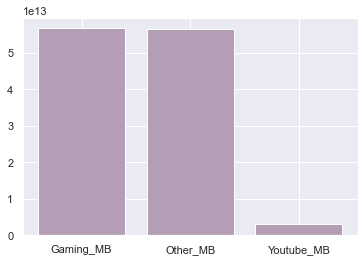

In [48]:
columns=['Social_Media_MB', 'Google_MB', 'Email_MB', 'Youtube_MB', 'Netflix_MB','Gaming_MB', 'Other_MB']
apps=user[columns].sum().sort_values(ascending=False).nlargest(3)

plt.bar(apps.index,apps,color='#b39eb5')
plt.show()

**Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics using the elbow method**

We can choose 4 as the number of clusters, as that's the value of k at the "elbow"

Text(0.5, 1.0, 'Grouping users by K-Means Clustering(Elbow Method)')

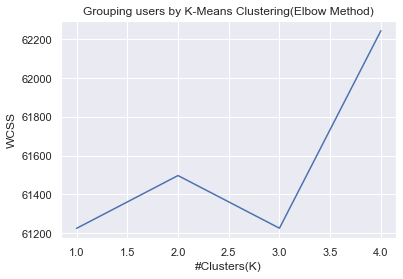

In [49]:
#Determining k
#wcss is the sum of squared distance between each point
customer=user[['No_of_xDRsessions', 'Session_Duration_s', 'Total_MB']]
columns = ['No_of_xDRsessions', 'Session_Duration_s', 'Total_MB']
customer[columns]=StandardScaler().fit_transform(customer[columns])

wcss_list=[]
for i in range(1,5):
    kmeans=KMeans()
    kmeans.fit(customer[columns])
    wcss_iter=kmeans.inertia_
    wcss_list.append(wcss_iter)

plt.plot(range(1,5),wcss_list)
plt.xlabel('#Clusters(K)')
plt.ylabel('WCSS')
plt.title('Grouping users by K-Means Clustering(Elbow Method)')

In [50]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
cluster=kmeans.fit_predict(customer[columns])
customer['cluster']=cluster
user_clusters=customer.groupby('cluster').agg({'No_of_xDRsessions':['min','mean','max','sum'],'Session_Duration_s':['min','mean','max','sum'],
                                      'Total_MB':['min','mean','max','sum']})

<h2>Task 3 - Experience Analytics</h2>

In [51]:
df.sample(5)

MSISDN_Number             Handset_Type  No_of_xDRsessions  \
32820 33658838372.000000        Samsung Galaxy S9                  2   
19066 33638706030.000000   Apple iPhone X (A1901)                  1   
73868 33671399916.000000   Apple iPhone X (A1901)                  1   
1397  33605372413.000000  Apple iPhone Se (A1723)                  1   
33737 33659026267.000000   Apple iPhone 7 (A1778)                  2   

       Session_Duration_s          Total_MB  Social_Media_MB       Google_MB  \
32820          163.703000 1189821582.000000   2659410.000000  6560676.000000   
19066           40.504000  776909914.000000   2463457.000000  6519393.000000   
73868           53.595000  436552389.000000   2735995.000000  7475557.000000   
1397           111.665000  186658821.000000   3473967.000000 11609161.000000   
33737           68.909000 1041838273.000000   1478246.000000 19723266.000000   

            Email_MB      Youtube_MB      Netflix_MB         Gaming_MB  \
32820 3082325.000000 53012815.000000 61252488.000000 1049320319.000000   
19066  538456.000000 17017553.000000 27639802.000000  721935505.000000   
73868 3251491.000000 27805430.000000 14771201.000000  375368778.000000   
1397  2834342.000000 11859738.000000 39022328.000000  102497434.000000   
33737 2940752.000000 56478148.000000 45708433.000000  909163661.000000   

              Other_MB  Avg_RTT_ms    Avg_TCP_MB  Avg_Throughput_kbps  \
32820 556394393.000000   31.750000 340880.750000         25102.750000   
19066  75626671.000000   42.500000  57514.500000         31051.000000   
73868 492595210.000000   16.500000  11767.000000          7923.000000   
1397  200727235.000000   28.500000 297802.000000            52.000000   
33737 212789744.000000   27.250000 601131.250000         16031.500000   

       engagement_clusters  
32820                    1  
19066                    0  
73868                    0  
1397                     0  
33737                    1

In [52]:
#Confirming that there are no outliers
df.isnull().any()

MSISDN_Number          False
Handset_Type           False
No_of_xDRsessions      False
Session_Duration_s     False
Total_MB               False
Social_Media_MB        False
Google_MB              False
Email_MB               False
Youtube_MB             False
Netflix_MB             False
Gaming_MB              False
Other_MB               False
Avg_RTT_ms             False
Avg_TCP_MB             False
Avg_Throughput_kbps    False
engagement_clusters    False
dtype: bool

**Aggregate, per customer, the following information**
* Average TCP retransmission
* Average RTT
* Handset type
* Average throughput

In [53]:
experience=frame.copy()
experience=experience.groupby(['MSISDN_Number','Handset_Type']).agg({'Avg_RTT_ms':'mean','Avg_TCP_MB':'mean','Avg_Throughput_kbps':'mean'}).reset_index()
experience.sample(5)

MSISDN_Number                Handset_Type  Avg_RTT_ms  \
12780  33625245652.000000  Samsung Galaxy A5 Sm-A520F   25.000000   
13577  33626473901.000000     Apple iPhone Se (A1723)   22.000000   
8267   33617980116.000000     Apple iPhone 6S (A1688)    8.000000   
54664  33663993750.000000                   undefined   25.000000   
101676 33769200807.000000      Apple iPhone 6 (A1586)   15.500000   

          Avg_TCP_MB  Avg_Throughput_kbps  
12780  297802.000000            44.750000  
13577  297802.000000            57.000000  
8267   297802.000000            32.500000  
54664  297802.000000             7.500000  
101676 297802.000000            39.000000

**Compute & list 10 of the top, bottom and most frequent:**
* TCP values in the dataset. 
* RTT values in the dataset.
* Throughput values in the dataset.

In [54]:
def sort_values(data,col1,asc):
    df=data[[col1]]
    dataf=df.sort_values(by=col1,ascending=asc).head(10)
    return dataf

Top 10s

In [55]:
sort_values(experience,'Avg_RTT_ms',False)

Avg_RTT_ms
47809  48462.000000
80054  27424.000000
41792  16167.500000
93608  13639.000000
1702   13150.000000
74075  12857.500000
104060 12694.000000
105480 12369.000000
85473  11505.250000
15348  10490.000000

In [56]:
sort_values(experience,'Avg_TCP_MB',False)

Avg_TCP_MB
85575 2150738719.500000
32144 2144060430.000000
57919 2134323675.000000
31813 2127329821.500000
61931 2105628909.500000
69930 2083297486.500000
43471 2068968868.500000
48165 2058902486.500000
63986 1984060298.000000
97963 1893435466.500000

In [57]:
sort_values(experience,'Avg_Throughput_kbps',False)

Avg_Throughput_kbps
37697         141965.500000
49418         132862.000000
60647         132588.250000
52639         127475.000000
14503         119491.000000
10311         117682.500000
104430        115491.000000
27609         114151.500000
92143         113667.000000
98032         113252.500000

Bottom 10s

In [58]:
sort_values(experience,'Avg_RTT_ms',True)

Avg_RTT_ms
28764    0.000000
44585    0.000000
38921    1.000000
83189    2.000000
35899    2.500000
69514    3.000000
21885    4.000000
3862     4.500000
74269    4.500000
17791    5.000000

In [59]:
sort_values(experience,'Avg_TCP_MB',True)

Avg_TCP_MB
23370    48.500000
6327     64.000000
96731    64.500000
13488    67.000000
2163     71.500000
25753    88.000000
101943   88.000000
105503   88.500000
77913    89.500000
89176    91.000000

In [60]:
sort_values(experience,'Avg_Throughput_kbps',True)

Avg_Throughput_kbps
101784             0.000000
80078              0.000000
18954              0.000000
9415               0.000000
94503              0.000000
86515              0.000000
42645              0.000000
86715              0.000000
41979              0.000000
59432              0.000000

Most frequently occurring

In [61]:
def val_counts(data,col):
    df=data[[col]]
    dataf=df.value_counts().head(10)
    return dataf

In [62]:
val_counts(experience,'Avg_RTT_ms')

Avg_RTT_ms
25.000000     19546
14.500000      2949
19.500000      2413
19.000000      1660
20.000000      1642
15.000000      1577
14.000000      1457
24.500000      1389
20.500000      1263
15.500000      1190
dtype: int64

In [63]:
val_counts(experience,'Avg_TCP_MB')

Avg_TCP_MB   
297802.000000    55983
287956.250000      367
287974.250000      164
11157.750000       144
292879.125000       82
287968.250000       81
11822.750000        76
10538.750000        76
10511.750000        70
288639.250000       65
dtype: int64

In [64]:
val_counts(experience,'Avg_Throughput_kbps')

Avg_Throughput_kbps
7.500000               2874
31.500000              2139
48.500000              1095
45.000000              1063
49.000000              1025
48.000000               938
49.500000               918
44.500000               881
45.500000               864
47.500000               856
dtype: int64

In [65]:
handset=experience.groupby('Handset_Type').agg({'Avg_Throughput_kbps':'mean','Avg_TCP_MB':'mean'}).reset_index()
handset

Handset_Type  Avg_Throughput_kbps  \
0                            A-Link Telecom I. Cubot A5         11755.000000   
1                     A-Link Telecom I. Cubot Note Plus          3349.500000   
2                        A-Link Telecom I. Cubot Note S          4468.500000   
3                          A-Link Telecom I. Cubot Nova         28108.500000   
4                         A-Link Telecom I. Cubot Power         34734.000000   
...                                                 ...                  ...   
1388  Zte Zte Blade C2 Smartphone Android By Sfr Sta...            29.000000   
1389                          Zyxel Communicat. Lte7460         30978.000000   
1390                          Zyxel Communicat. Sbg3600         48675.500000   
1391                    Zyxel Communicat. Zyxel Wah7706          1086.500000   
1392                                          undefined          4289.223030   

          Avg_TCP_MB  
0      297802.000000  
1      308106.500000  
2    20705865.500000  
3       68585.000000  
4        4020.500000  
...              ...  
1388   154812.375000  
1389 20638273.000000  
1390 26743469.000000  
1391    10550.750000  
1392   648251.855036  

[1393 rows x 3 columns]

**The distribution of the average throughput  per handset type**

In [66]:
def sort_handset(data,col1,col2,n):
    handsets=data.sort_values(by=col1,ascending=False)

    #plot
    plt.figure(figsize=(12,6))
    ax=sns.barplot(handsets[col2][:n],handsets[col1][:n],palette='PuBuGn',dodge=False)
    ax.set_xticklabels(handsets[col2][:n],rotation=80)
    plt.title(f'Distribution of the top {n} {col1} per {col2}')
    plt.show()

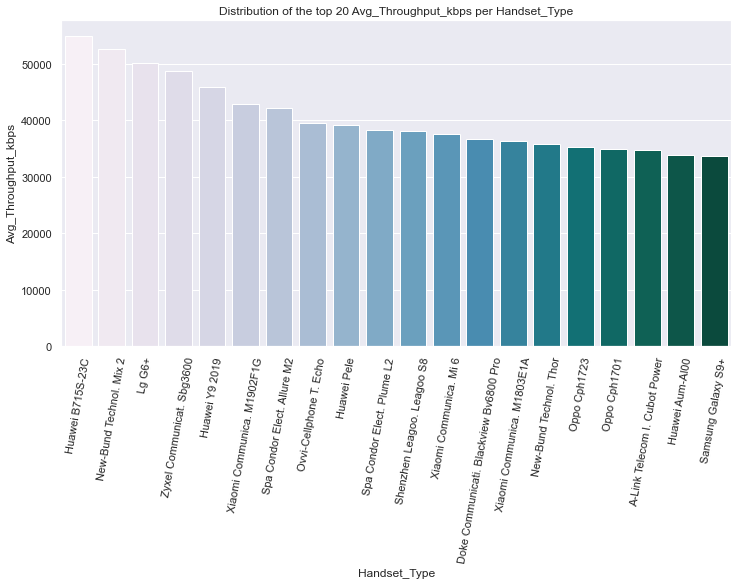

In [67]:
sort_handset(handset,'Avg_Throughput_kbps','Handset_Type',20)

**The distribution of the average TCP retransmission per handset type**

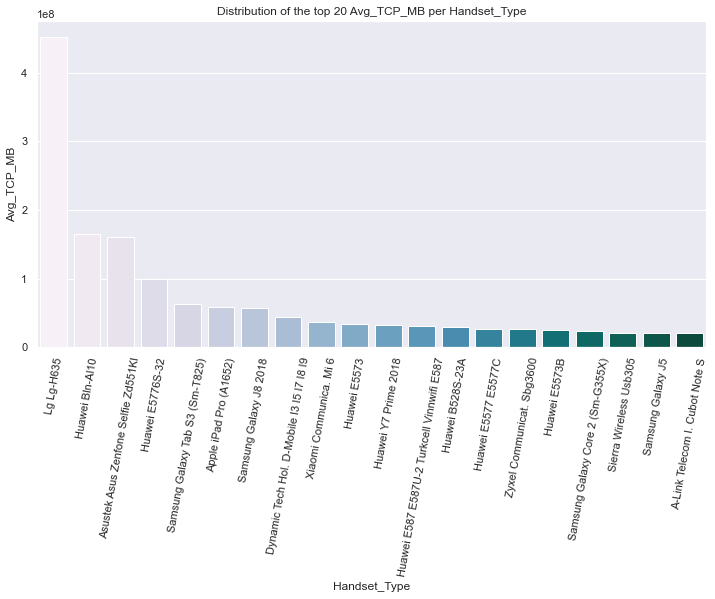

In [68]:
sort_handset(handset,'Avg_TCP_MB','Handset_Type',20)

**Using the experience metrics above, perform a k-means clustering (where k = 3)**

In [69]:
#call the k-means function we created
columns=['Avg_RTT_ms','Avg_Throughput_kbps', 'Avg_TCP_MB']
kmeans_clusters(df,columns,3,'experience_clusters')

In [70]:
experience_metrics=df.groupby('experience_clusters').agg({'Avg_RTT_ms':'mean','Avg_Throughput_kbps':'mean','Avg_TCP_MB':'mean'})
experience_metrics

Avg_RTT_ms  Avg_Throughput_kbps        Avg_TCP_MB
experience_clusters                                                   
0                     60.205791          2173.570967     792239.261522
1                     51.044591         27602.780357    9405208.924641
2                     72.256869         35976.375909 1102624992.518636

In [71]:
engagement_metrics

No_of_xDRsessions                     Session_Duration_s  \
                                  min     mean max    sum                min   
engagement_clusters                                                            
0                                   1 1.032223   2  82456           7.142000   
1                                   1 2.199607   4  51451          18.235000   
2                                   1 4.571126  56  15103          85.554000   

                                                                   Total_MB  \
                          mean          max            sum              min   
engagement_clusters                                                           
0                   103.427741   877.385000 8262014.804002  33249009.000000   
1                   218.964695  1480.875000 5121803.176000 118487293.000000   
2                   683.170063 18553.754000 2257193.888000 370420998.000000   

                                                                                
                                 mean                max                   sum  
engagement_clusters                                                             
0                    495302696.883466   950760661.000000 39565770032445.000000  
1                   1131225024.087555  2545438880.000000 26460484538432.000000  
2                   2377302707.309625 29238058308.000000  7854608144951.000000

<h2>Task 4 - Satisfaction Analysis</h2>

Calculate:
* engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) 
* experience score to each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience’s cluster. 

In [72]:
df.sample()

MSISDN_Number            Handset_Type  No_of_xDRsessions  \
57721 33664860684.000000  Essential Produc. Ph-1                  1   

       Session_Duration_s         Total_MB  Social_Media_MB      Google_MB  \
57721           24.616000 789814571.000000   3236684.000000 4323884.000000   

            Email_MB      Youtube_MB      Netflix_MB        Gaming_MB  \
57721 1442479.000000 25328662.000000 27535322.000000 719295211.000000   

              Other_MB  Avg_RTT_ms  Avg_TCP_MB  Avg_Throughput_kbps  \
57721 651415665.000000   31.000000 5506.000000         12287.500000   

       engagement_clusters  experience_clusters  
57721                    0                    0

In [73]:
engagement_metrics

No_of_xDRsessions                     Session_Duration_s  \
                                  min     mean max    sum                min   
engagement_clusters                                                            
0                                   1 1.032223   2  82456           7.142000   
1                                   1 2.199607   4  51451          18.235000   
2                                   1 4.571126  56  15103          85.554000   

                                                                   Total_MB  \
                          mean          max            sum              min   
engagement_clusters                                                           
0                   103.427741   877.385000 8262014.804002  33249009.000000   
1                   218.964695  1480.875000 5121803.176000 118487293.000000   
2                   683.170063 18553.754000 2257193.888000 370420998.000000   

                                                                                
                                 mean                max                   sum  
engagement_clusters                                                             
0                    495302696.883466   950760661.000000 39565770032445.000000  
1                   1131225024.087555  2545438880.000000 26460484538432.000000  
2                   2377302707.309625 29238058308.000000  7854608144951.000000

In [74]:
experience_metrics

Avg_RTT_ms  Avg_Throughput_kbps        Avg_TCP_MB
experience_clusters                                                   
0                     60.205791          2173.570967     792239.261522
1                     51.044591         27602.780357    9405208.924641
2                     72.256869         35976.375909 1102624992.518636

In [75]:
df['satisfaction_score']= avg_col(df,'engagement_clusters','experience_clusters')
df.sample(10)

MSISDN_Number                 Handset_Type  No_of_xDRsessions  \
102308 33770357912.000000       Apple iPhone 8 (A1905)                  1   
52987  33663591927.000000                    undefined                  1   
57599  33664836428.000000               Huawei Y6 2018                  1   
21487  33646707562.000000  Apple iPhone Xs Max (A2101)                  1   
68016  33668139754.000000      Apple iPhone 6S (A1688)                  2   
42511  33661056161.000000  Apple iPhone Xs Max (A2101)                  2   
93763  33761022146.000000  Apple iPhone 7 Plus (A1784)                  1   
50167  33662855907.000000       Apple iPhone 6 (A1586)                  1   
90534  33751588847.000000      Apple iPhone 6S (A1688)                  2   
68929  33668448717.000000      Apple iPhone Se (A1723)                  1   

        Session_Duration_s          Total_MB  Social_Media_MB       Google_MB  \
102308           83.640000  233182879.000000   2867260.000000  6301623.000000   
52987            27.040000  619424483.000000    251208.000000  3899410.000000   
57599           221.560000  767697337.000000   1774948.000000 12626983.000000   
21487            93.055000   88705729.000000   2096125.000000  6795200.000000   
68016           169.117000  622890330.000000   4275868.000000 18489092.000000   
42511           193.338000 1445727260.000000   6688523.000000 18660440.000000   
93763            86.148000  377414244.000000   1636137.000000 12057532.000000   
50167            86.399000  470854234.000000   2938154.000000  9024884.000000   
90534            77.893000 1143456746.000000   4613119.000000 11621327.000000   
68929            93.252000  358402119.000000   1746855.000000  2979785.000000   

             Email_MB      Youtube_MB      Netflix_MB         Gaming_MB  \
102308 2668151.000000 22950108.000000 25852031.000000  167102889.000000   
52987  1963262.000000 23750395.000000 14228412.000000  564318909.000000   
57599  2964643.000000 27302428.000000 37080255.000000  678322880.000000   
21487  1308158.000000 39574289.000000 13901890.000000   21721119.000000   
68016  4660811.000000 44768937.000000 47830102.000000  496071782.000000   
42511  6991841.000000 27315750.000000 32191273.000000 1338059599.000000   
93763  2841518.000000 28531959.000000 18857719.000000  300780423.000000   
50167  1776696.000000 28733324.000000 25158319.000000  399317679.000000   
90534  7319208.000000 45885549.000000 56568003.000000  995572049.000000   
68929  2673512.000000 39848131.000000 42880886.000000  263451110.000000   

               Other_MB  Avg_RTT_ms     Avg_TCP_MB  Avg_Throughput_kbps  \
102308 622476999.000000   14.500000  297802.000000            31.500000   
52987  826524729.000000   19.500000   67576.000000         54065.500000   
57599  399444336.000000   19.500000  297802.000000            41.000000   
21487  359341022.000000   14.500000  297802.000000            57.000000   
68016  278449680.000000   16.750000  297802.000000            43.500000   
42511  686772508.000000   14.500000  297802.000000            59.750000   
93763  591668480.000000   70.000000  532887.500000         16124.000000   
50167  680789718.000000   21.000000 1019640.500000         28687.000000   
90534  907271150.000000   27.500000  154870.750000          2425.500000   
68929  720486262.000000   13.500000  297802.000000            53.500000   

        engagement_clusters  experience_clusters  satisfaction_score  
102308                    0                    0            0.000000  
52987                     0                    1            0.500000  
57599                     0                    0            0.000000  
21487                     0                    0            0.000000  
68016                     1                    0            0.500000  
42511                     1                    0            0.500000  
93763                     0                    1            0.500000  
50167                     0                    1    

In [76]:
#satisfaction score ranges from 0-3
sort_metrics(df,'satisfaction_score','MSISDN_Number')

satisfaction_score      MSISDN_Number
70761            2.000000 33669054076.000000
89375            2.000000 33699756831.000000
25664            2.000000 33650658056.000000
51452            2.000000 33663180885.000000
97965            2.000000 33762644658.000000
66719            2.000000 33667725464.000000
42213            2.000000 33660977522.000000
51595            1.500000 33663216556.000000
37954            1.500000 33659963743.000000
37915            1.500000 33659956441.000000

**Build a regression model of your choice to predict the satisfaction score of a
customer**

Multivariate Linear Regression Model because we have multiple explanatory variables

In [77]:
df=pd.get_dummies(data=df,columns=['Handset_Type'])
df.head()

MSISDN_Number  No_of_xDRsessions  Session_Duration_s          Total_MB  \
0 33601001722.000000                  1          116.720000  878690574.000000   
1 33601001754.000000                  1          181.230000  156859643.000000   
2 33601002511.000000                  1          134.969000  595966483.000000   
3 33601007832.000000                  1           49.878000  422320698.000000   
4 33601008617.000000                  2           37.104000 1457410944.000000   

   Social_Media_MB       Google_MB       Email_MB      Youtube_MB  \
0   2232135.000000  4389005.000000 1331362.000000 21624548.000000   
1   2660565.000000  5334863.000000 3307781.000000 12432223.000000   
2   3195623.000000  3443126.000000 3205380.000000 21333570.000000   
3    280294.000000  9678493.000000 2284670.000000  6977321.000000   
4   2912542.000000 18499616.000000 3305469.000000 41533002.000000   

       Netflix_MB         Gaming_MB         Other_MB  Avg_RTT_ms  \
0 27180981.000000  812458661.000000 386570872.000000   23.000000   
1 11221763.000000  119750078.000000 281710071.000000   15.500000   
2 19353900.000000  538827713.000000 501693672.000000   25.000000   
3  1942092.000000  391126127.000000  35279702.000000   42.000000   
4 49201724.000000 1314797820.000000 804804484.000000   29.750000   

      Avg_TCP_MB  Avg_Throughput_kbps  engagement_clusters  \
0  297802.000000            38.000000                    0   
1  297802.000000            49.500000                    0   
2  297802.000000            48.500000                    0   
3   11025.750000           124.000000                    0   
4 2491609.000000         14211.000000                    1   

   experience_clusters  satisfaction_score  \
0                    0            0.000000   
1                    0            0.000000   
2                    0            0.000000   
3                    0            0.000000   
4                    0            0.500000   

   Handset_Type_A-Link Telecom I. Cubot A5  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Handset_Type_A-Link Telecom I. Cubot Note Plus  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Handset_Type_A-Link Telecom I. Cubot Note S  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Handset_Type_A-Link Telecom I. Cubot Nova  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   Handset_Type_A-Link Telecom I. Cubot Power  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Handset_Type_A-Link Telecom I. Cubot R9  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Handset_Type_A-Link Telecom I. Cubot X18 Plus  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                           

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X= df.drop(['satisfaction_score','MSISDN_Number'],axis=1)
y=df['satisfaction_score']
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=0)

regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()